In [1]:
## Importing Libraries

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [3]:
## Data Preprocessing
# Training Image Preprocessing

In [4]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 7392 files belonging to 5 classes.


In [5]:
#Validation Image Preprocessing
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 2160 files belonging to 5 classes.


In [6]:
import tensorflow as tf
from tensorflow.keras import layers, models

In [8]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Create the ResNet-50 model
def create_resnet50_model(input_shape, num_classes):
    base_model = tf.keras.applications.ResNet50(weights='imagenet', include_top=False, input_shape=input_shape)

    # Freeze the convolutional base
    base_model.trainable = False

    # Add custom classification head
    model = models.Sequential([
        base_model,
        layers.GlobalAveragePooling2D(),
        layers.Dense(256, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation='softmax')
    ])

    return model

In [9]:
# Define image size and number of classes
image_size = (128, 128)
num_classes = len(training_set.class_names)

# Create the ResNet-50 model
model = create_resnet50_model(input_shape=(image_size[0], image_size[1], 3), num_classes=num_classes)

In [12]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [13]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)                │ ?                           │      23,587,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ ?                           │     0 (unbuilt) │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 23,587,712 (89.98 MB)

In [14]:
# Train the model
history = model.fit(
    training_set,
    validation_data=validation_set,
    epochs=10
)

Epoch 1/10
231/231 ━━━━━━━━━━━━━━━━━━━━ 244s 1s/step - accuracy: 0.6326 - loss: 1.0074 - val_accuracy: 0.8569 - val_loss: 0.3803
Epoch 2/10
231/231 ━━━━━━━━━━━━━━━━━━━━ 242s 1s/step - accuracy: 0.8268 - loss: 0.4112 - val_accuracy: 0.9037 - val_loss: 0.2940
Epoch 3/10
231/231 ━━━━━━━━━━━━━━━━━━━━ 249s 1s/step - accuracy: 0.8657 - loss: 0.3296 - val_accuracy: 0.9097 - val_loss: 0.2552
Epoch 4/10
231/231 ━━━━━━━━━━━━━━━━━━━━ 256s 1s/step - accuracy: 0.8859 - loss: 0.2775 - val_accuracy: 0.9236 - val_loss: 0.1975
Epoch 5/10
231/231 ━━━━━━━━━━━━━━━━━━━━ 249s 1s/step - accuracy: 0.9177 - loss: 0.2108 - val_accuracy: 0.9255 - val_loss: 0.1895
Epoch 6/10
231/231 ━━━━━━━━━━━━━━━━━━━━ 240s 1s/step - accuracy: 0.9254 - loss: 0.1914 - val_accuracy: 0.9440 - val_loss: 0.1476
Epoch 7/10
231/231 ━━━━━━━━━━━━━━━━━━━━ 244s 1s/step - accuracy: 0.9346 - loss: 0.1620 - val_accuracy: 0.9407 - val_loss: 0.1509
Epoch 8/10
231/231 ━━━━━━━━━━━━━━━━━━━━ 250s 1s/step - accuracy: 0.9453 - loss: 0.1421 - val_accu

In [15]:
  #Model Evaluation on Training set

train_loss,train_acc = model.evaluate(training_set)

231/231 ━━━━━━━━━━━━━━━━━━━━ 194s 840ms/step - accuracy: 0.9941 - loss: 0.0366


In [16]:
print(train_loss,train_acc)

0.03500458225607872 0.9940476417541504


In [17]:
#Model Evaluation on Validation set

val_loss,val_acc = model.evaluate(validation_set)

68/68 ━━━━━━━━━━━━━━━━━━━━ 57s 842ms/step - accuracy: 0.9615 - loss: 0.1090


In [18]:
print(val_loss,val_acc)

0.10586068779230118 0.9624999761581421


In [19]:
# Some other metrics for model evaluation

In [20]:
class_name = validation_set.class_names
class_name

['Cauliflower_Healthy',
 'Cauliflower_Healthy_Leaf',
 'Cauliflower_Leaf_Black_Rot',
 'Cauliflower_Leaf_Red_Spot',
 'Cauliflower_Spot_Rot']

In [21]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=1,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 2160 files belonging to 5 classes.


In [22]:
y_pred = model.predict(test_set)
y_pred,y_pred.shape

2160/2160 ━━━━━━━━━━━━━━━━━━━━ 110s 50ms/step


(array([[9.9999881e-01, 3.7254606e-18, 9.9151632e-17, 1.1316908e-16,
         1.1372152e-06],
        [9.9999952e-01, 2.9420734e-19, 1.7191444e-17, 3.0117861e-18,
         5.1078962e-07],
        [9.9999964e-01, 1.2320111e-16, 9.7743918e-15, 9.8458580e-17,
         4.0276674e-07],
        ...,
        [7.9861886e-05, 1.2855801e-14, 1.9488568e-14, 3.2387255e-13,
         9.9992013e-01],
        [8.0281933e-07, 1.5928400e-14, 7.1799315e-15, 1.0658676e-14,
         9.9999917e-01],
        [1.4424498e-06, 3.7196326e-13, 5.6008725e-14, 1.1061384e-14,
         9.9999857e-01]], dtype=float32),
 (2160, 5))

In [23]:
predicted_categories = tf.argmax(y_pred,axis=1)

In [24]:
predicted_categories

<tf.Tensor: shape=(2160,), dtype=int64, numpy=array([0, 0, 0, ..., 4, 4, 4], dtype=int64)>

In [25]:
true_categories = tf.concat([y for x,y in test_set],axis=0)
true_categories

<tf.Tensor: shape=(2160, 5), dtype=float32, numpy=
array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.]], dtype=float32)>

In [26]:
Y_true = tf.argmax(true_categories,axis=1)
Y_true

<tf.Tensor: shape=(2160,), dtype=int64, numpy=array([0, 0, 0, ..., 4, 4, 4], dtype=int64)>

In [27]:
from sklearn.metrics import classification_report,confusion_matrix

In [28]:
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                            precision    recall  f1-score   support

       Cauliflower_Healthy       0.99      1.00      0.99       420
  Cauliflower_Healthy_Leaf       0.97      0.97      0.97       624
Cauliflower_Leaf_Black_Rot       0.91      0.92      0.91       372
 Cauliflower_Leaf_Red_Spot       0.94      0.93      0.93       372
      Cauliflower_Spot_Rot       1.00      0.99      0.99       372

                  accuracy                           0.96      2160
                 macro avg       0.96      0.96      0.96      2160
              weighted avg       0.96      0.96      0.96      2160



In [29]:
cm = confusion_matrix(Y_true,predicted_categories)
cm.shape

(5, 5)

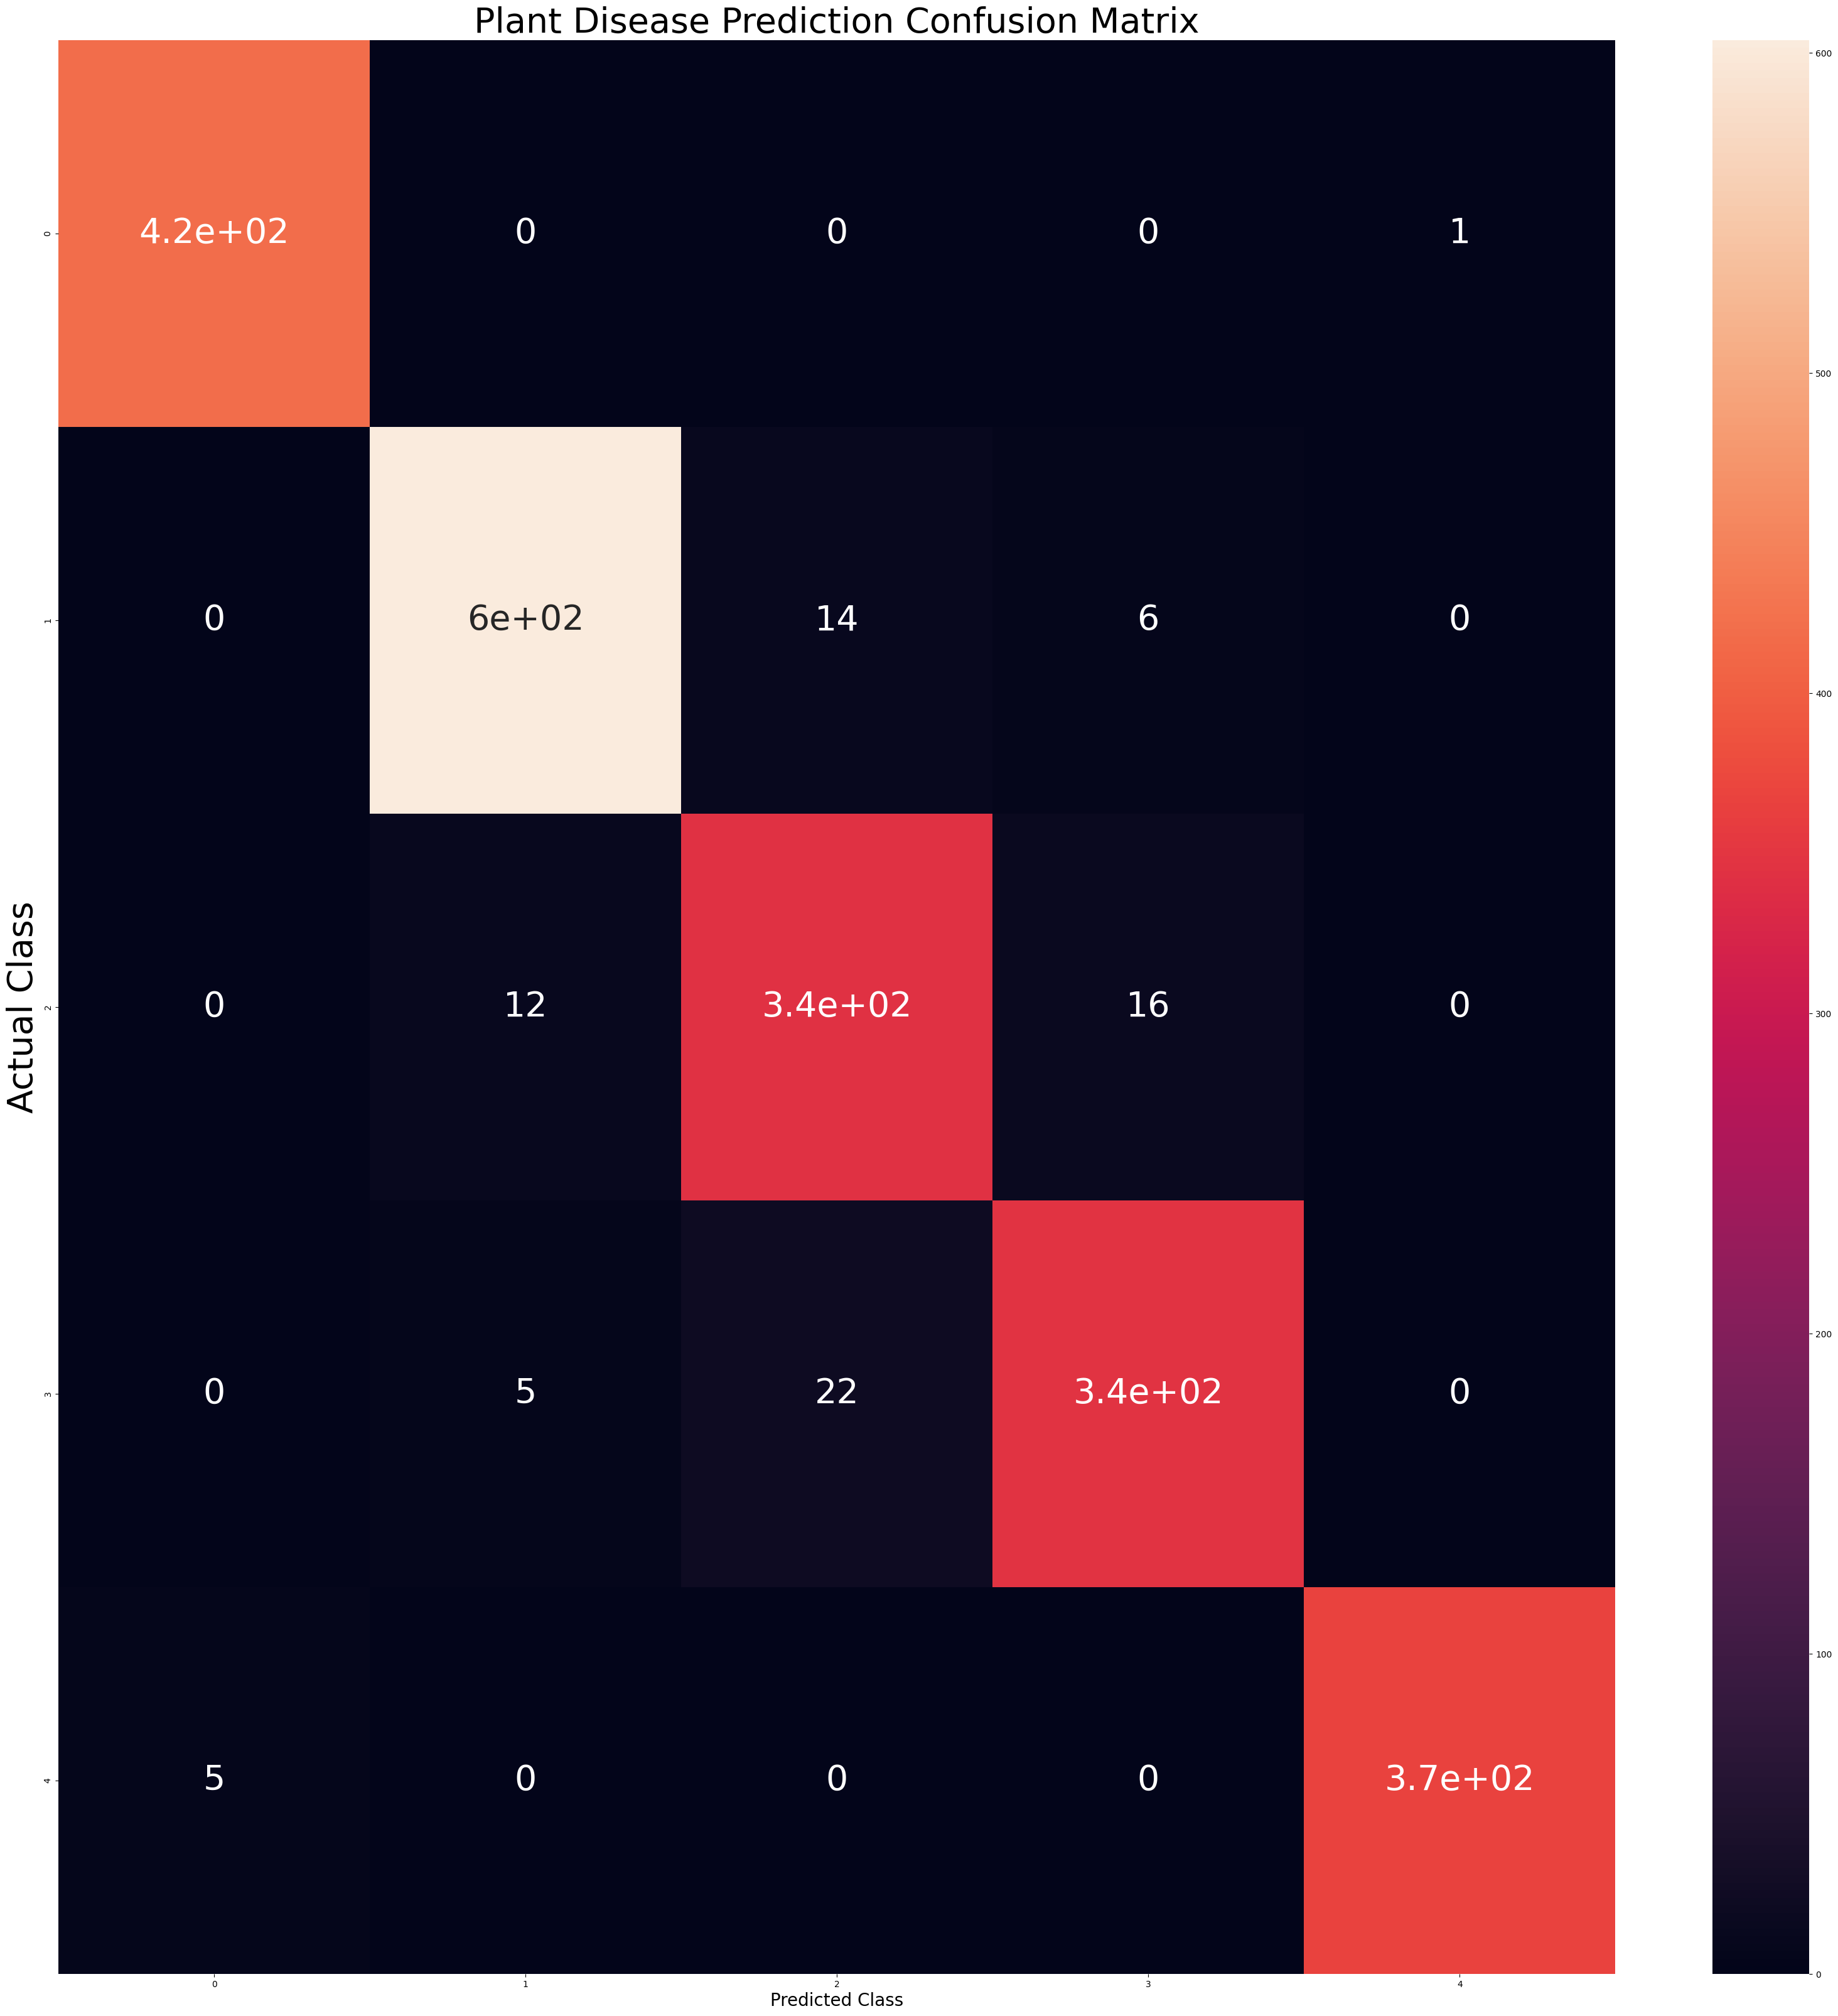

In [30]:
plt.figure(figsize=(40, 40))
sns.heatmap(cm,annot=True,annot_kws={"size": 40})

plt.xlabel('Predicted Class',fontsize = 20)
plt.ylabel('Actual Class',fontsize = 40)
plt.title('Plant Disease Prediction Confusion Matrix',fontsize = 40)
plt.show()